In [79]:
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [81]:
data = pd.read_csv('Copy of data.csv')

In [82]:
data=pd.DataFrame(data)

In [10]:
print(data.head())
print(data.shape)

           X          Y
0  13.117928  17.219461
1  26.994258  19.912078
2  12.552476  23.800750
3  27.761221  23.878208
4  27.718304  18.495450
(1299, 2)


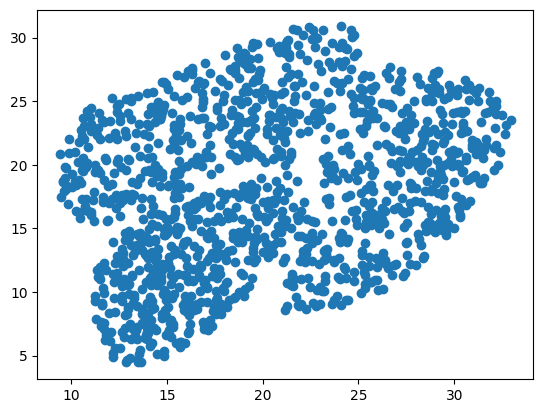

In [11]:
plt.scatter(x=data['X'],y=data['Y'])
plt.show()

In [12]:
data.describe()

X            Y
count  1299.000000  1299.000000
mean     19.983506    17.901512
std       5.977820     6.224694
min       9.418294     4.451615
25%      14.894048    12.853875
50%      19.223866    17.905258
75%      24.895330    23.061075
max      32.950081    30.868294

In [19]:
!pip install scikit-learn-extra
!pip install fcmeans
!pip install somoclu
!pip install minisom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.1 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement fcmeans (from versions: none)
ERROR: No matching distribution found for fcmeans
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for somoclu: filename=somoclu-1.7.6-cp310-cp310-linux_x86_64.whl size=595824 sha256=5d968043570c791e9bd7626b03413ab9d896747e812034d5a91435873ed0a1b6
  Stored in directory: /root/.cache/pip/wheels/59/c3/65/d78959b2e432af6e863523efe8d1faa21111c1cc7fd4e04436
Successfully built somoclu


In [20]:
!pip install fuzzy-c-means

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.4 MB/s eta 0:00:00
  Attempting uninstall: typer
    Found existing installation: typer 0.13.0
    Uninstalling typer-0.13.0:
      Successfully uninstalled typer-0.13.0
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.26.0 requires tabulate>=0.9, but you have tabulate 0.8.10 which is incompatible.


In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, OPTICS, MeanShift, AgglomerativeClustering, SpectralClustering, Birch
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids
from fcmeans import FCM
from minisom import MiniSom
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

np.random.seed(42)
data=data

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

plt.figure(figsize=(20, 15))

algorithms = {
    "K-Means": KMeans(n_clusters=3, random_state=42),
    "K-Medoids (PAM)": KMedoids(n_clusters=3, random_state=42),
    "DBSCAN": DBSCAN(eps=0.5, min_samples=5),
    "OPTICS": OPTICS(min_samples=5),
    "Mean-Shift": MeanShift(),
    "Agglomerative Clustering": AgglomerativeClustering(n_clusters=3),
    "BIRCH": Birch(n_clusters=3),
    "Spectral Clustering": SpectralClustering(n_clusters=3, random_state=42, assign_labels="discretize"),
    "Gaussian Mixture Models (GMM)": GaussianMixture(n_components=3, random_state=42),
    "Fuzzy C-Means": FCM(n_clusters=3)
}

som = MiniSom(x=3, y=1, input_len=2, sigma=0.5, learning_rate=0.5)
som.random_weights_init(data_scaled)
som.train_random(data_scaled, 100)

for i, (name, model) in enumerate(algorithms.items(), start=1):
    if name == "Fuzzy C-Means":
        model.fit(data_scaled)
        labels = model.predict(data_scaled)
    else:
        model.fit(data_scaled)
        labels = model.predict(data_scaled) if hasattr(model, "predict") else model.fit_predict(data_scaled)

    plt.subplot(4, 4, i)
    plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels, cmap="viridis", s=50, edgecolor="k")
    plt.title(name, fontsize=10)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

plt.subplot(4, 4, len(algorithms) + 1)
labels = [som.winner(d) for d in data_scaled]
labels = np.array([c[0] for c in labels])
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels, cmap="viridis", s=50, edgecolor="k")
plt.title("Self-Organizing Maps (SOM)", fontsize=10)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

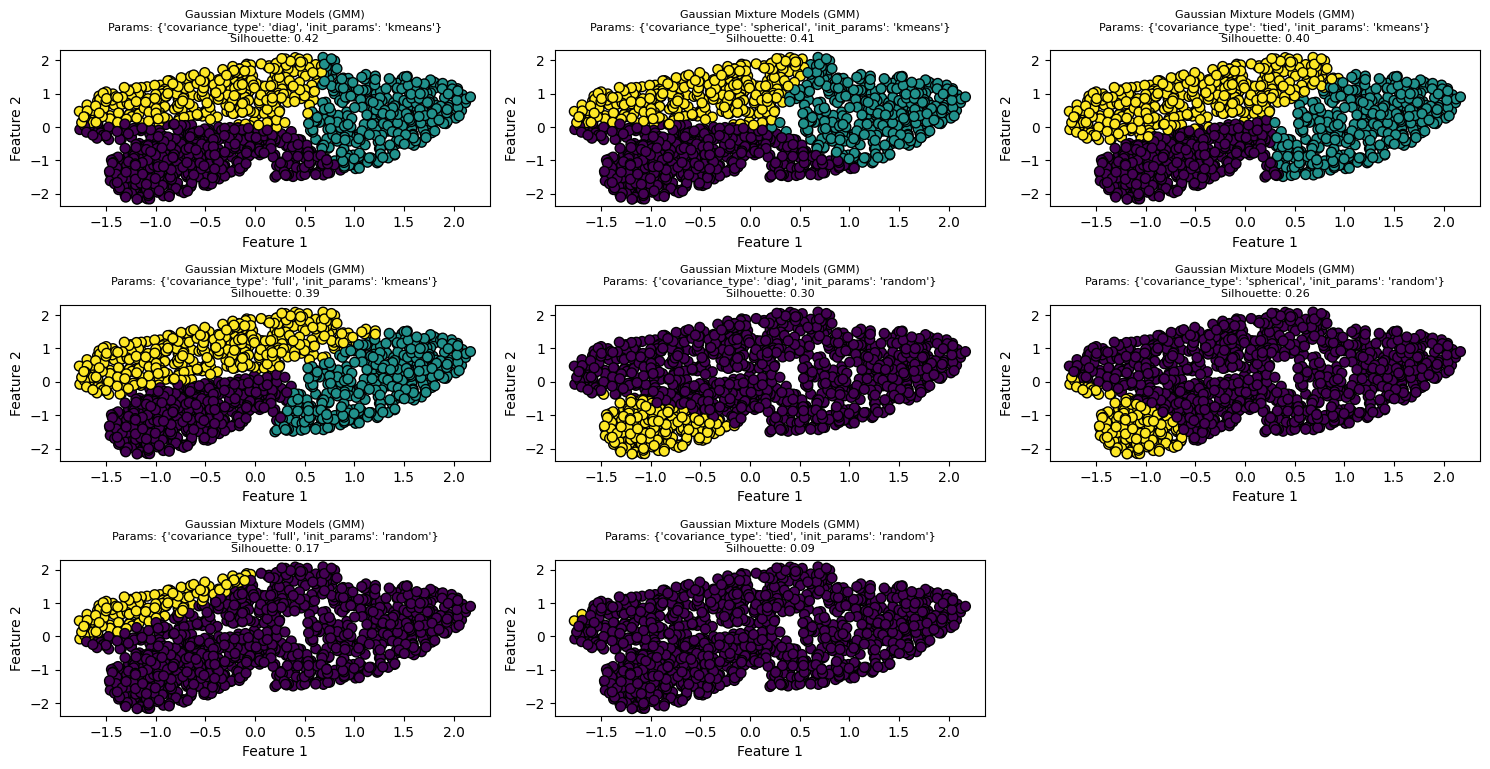

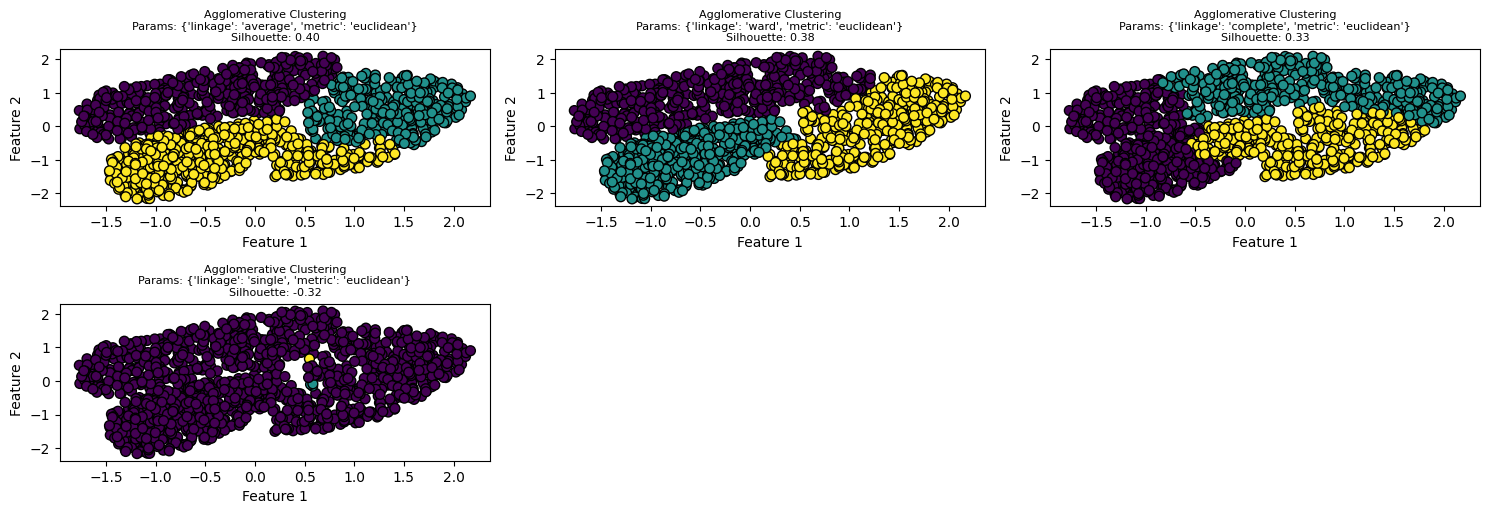

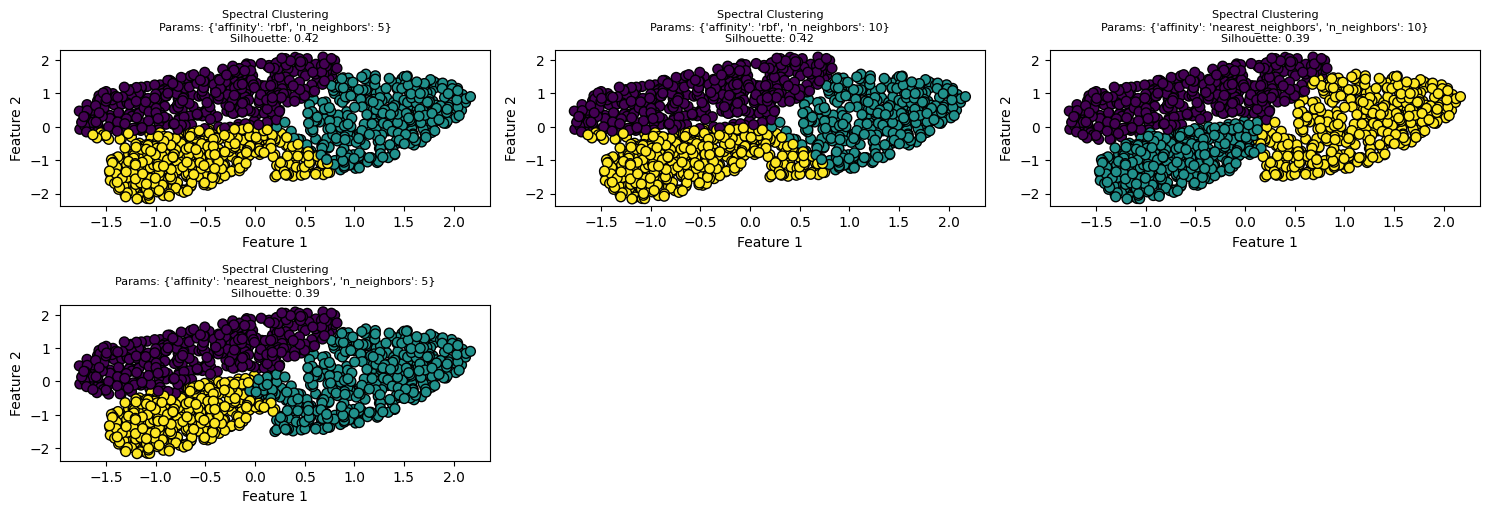

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

def tune_and_plot_fixed_clusters(algorithm_name, model, param_grid, data, num_clusters=3, is_gmm=False):
    results = []
    labels_dict = {}

    for params in ParameterGrid(param_grid):
        if is_gmm:
            model.set_params(**params)
            model.n_components = num_clusters
            model.fit(data)
            labels = model.predict(data)
        else:
            model.set_params(**params)
            model.n_clusters = num_clusters
            labels = model.fit_predict(data)

        if len(set(labels)) > 1:
            score = silhouette_score(data, labels)
        else:
            score = -1

        results.append((params, score))
        labels_dict[str(params)] = labels


    plt.figure(figsize=(15, 15))
    for i, (params, score) in enumerate(sorted(results, key=lambda x: -x[1])):
        labels = labels_dict[str(params)]
        plt.subplot(6, 3, i + 1)
        plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50, edgecolor='k')
        plt.title(f"{algorithm_name}\nParams: {params}\nSilhouette: {score:.2f}", fontsize=8)
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
    plt.tight_layout()
    plt.show()

gmm = GaussianMixture(random_state=42)
gmm_param_grid = {
    "covariance_type": ["full", "tied", "diag", "spherical"],
    "init_params": ["kmeans", "random"]
}
tune_and_plot_fixed_clusters("Gaussian Mixture Models (GMM)", gmm, gmm_param_grid, data_scaled, is_gmm=True)

agglo = AgglomerativeClustering()
agglo_param_grid = {
    "linkage": ["ward", "complete", "average", "single"],
    "metric": ["euclidean", "l1", "l2", "manhattan", "cosine"]
}

for params in ParameterGrid(agglo_param_grid):
    if params["linkage"] == "ward" and params["metric"] != "euclidean":
        agglo_param_grid["metric"] = ["euclidean"]
        break

tune_and_plot_fixed_clusters("Agglomerative Clustering", agglo, agglo_param_grid, data_scaled)

spectral = SpectralClustering(random_state=42, assign_labels="discretize")
spectral_param_grid = {
    "affinity": ["nearest_neighbors", "rbf"],
    "n_neighbors": [5, 10]
}
tune_and_plot_fixed_clusters("Spectral Clustering", spectral, spectral_param_grid, data_scaled)


Silhouette Score for the ensemble clustering: 0.37


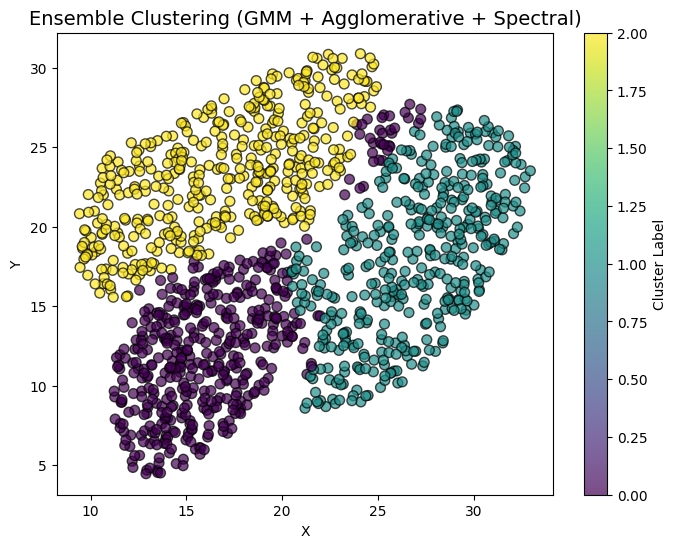

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

def ensemble_clustering(data, n_clusters=3):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm_labels = gmm.fit_predict(data_scaled)

    agglo = AgglomerativeClustering(n_clusters=n_clusters)
    agglo_labels = agglo.fit_predict(data_scaled)

    spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
    spectral_labels = spectral.fit_predict(data_scaled)

    labels_combined = pd.DataFrame({'GMM': gmm_labels, 'Agglomerative': agglo_labels, 'Spectral': spectral_labels})

    final_labels = labels_combined.mode(axis=1)[0]

    silhouette_avg = silhouette_score(data_scaled, final_labels)
    print(f"Silhouette Score for the ensemble clustering: {silhouette_avg:.2f}")

    return final_labels

final_labels = ensemble_clustering(data)

plt.figure(figsize=(8, 6))
plt.scatter(data['X'], data['Y'], c=final_labels, cmap='viridis', s=50, alpha=0.7, edgecolor='k')
plt.title('Ensemble Clustering (GMM + Agglomerative + Spectral)', fontsize=14)
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Cluster Label')
plt.show()


# Best result is obtained from the code below

# It is ensemble of best three algorithms from previous results

Silhouette Score for the ensemble clustering: 0.39


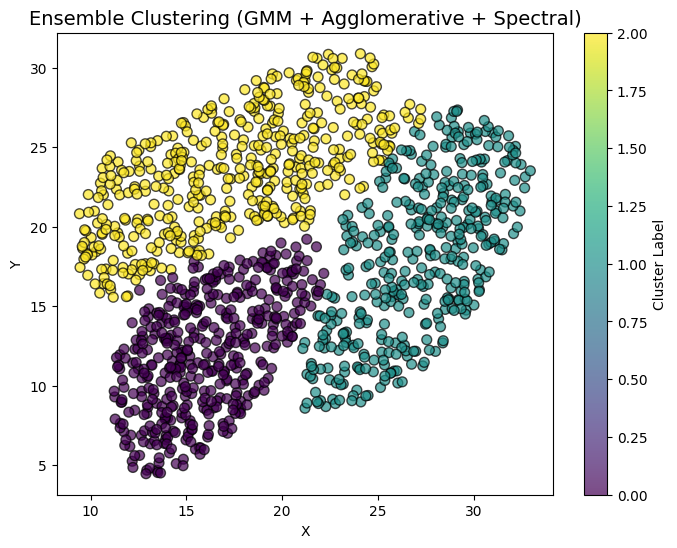

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Function to adjust labels according to predefined mapping
def adjust_labels(labels, label_mapping):
    return np.array([label_mapping[label] for label in labels])

# Function to combine GMM, Agglomerative, and Spectral clustering results
def ensemble_clustering(data, n_clusters=3):
    # Step 1: Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    # Step 2: Fit Gaussian Mixture Model (GMM)
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm_labels = gmm.fit_predict(data_scaled)

    # Step 3: Fit Agglomerative Clustering
    agglo = AgglomerativeClustering(n_clusters=n_clusters)
    agglo_labels = agglo.fit_predict(data_scaled)

    # Step 4: Fit Spectral Clustering
    spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
    spectral_labels = spectral.fit_predict(data_scaled)

    # Step 5: Define the label mapping as per my scheme
    # Cluster 1 -> 'a', Cluster 2 -> 'b', Cluster 3 -> 'c' for all algorithms
    gmm_label_mapping = {0: 'a', 1: 'b', 2: 'c'}  # Adjust this mapping as per my clusters
    agglo_label_mapping = {0: 'c', 1: 'a', 2: 'b'}  # Adjust this mapping as per my clusters
    spectral_label_mapping = {0: 'c', 1: 'b', 2: 'a'}  # Adjust this mapping as per my clusters

    # Step 6: Adjust labels for each algorithm
    gmm_labels_adjusted = adjust_labels(gmm_labels, gmm_label_mapping)
    agglo_labels_adjusted = adjust_labels(agglo_labels, agglo_label_mapping)
    spectral_labels_adjusted = adjust_labels(spectral_labels, spectral_label_mapping)

    # Step 7: Combine the clustering results (Majority Voting)
    # Create a dataframe to combine all adjusted labels
    labels_combined = pd.DataFrame({'GMM': gmm_labels_adjusted, 'Agglomerative': agglo_labels_adjusted, 'Spectral': spectral_labels_adjusted})

    # Majority voting - For each sample, take the mode of the three labels
    final_labels = labels_combined.mode(axis=1)[0]

    # Step 8: Evaluate the clustering (optional)
    silhouette_avg = silhouette_score(data_scaled, final_labels)
    print(f"Silhouette Score for the ensemble clustering: {silhouette_avg:.2f}")

    return final_labels



# Perform ensemble clustering and get the final labels
final_labels = ensemble_clustering(data)

# Plot the clustering results
plt.figure(figsize=(8, 6))
plt.scatter(data['X'], data['Y'], c=final_labels.map({'a': 0, 'b': 1, 'c': 2}), cmap='viridis', s=50, alpha=0.7, edgecolor='k')
plt.title('Ensemble Clustering (GMM + Agglomerative + Spectral)', fontsize=14)
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Cluster Label')
plt.show()


In [88]:
def save_labels_to_txt(labels, filename='clustering_labels.txt'):
    with open(filename, 'w') as file:
        for label in labels:
            file.write(f"{label}\n")

final_labels = ensemble_clustering(data)

save_labels_to_txt(final_labels, filename='/content/gdrive/MyDrive/Machine Learning/assignment2/clustering_labels(a_b_c).txt')

print("Cluster labels have been saved to 'clustering_labels.txt'.")


Silhouette Score for the ensemble clustering: 0.39
Cluster labels have been saved to 'clustering_labels.txt'.


In [90]:
def save_labels_to_txt(labels, filename='/content/gdrive/MyDrive/Machine Learning/assignment2/clustering_labels.txt'):
    label_mapping = {'a': 0, 'b': 1, 'c': 2}
    with open(filename, 'w') as file:
        for label in labels:
            converted_label = label_mapping.get(label, label)
            file.write(f"{converted_label}\n")

final_labels = ensemble_clustering(data)

save_labels_to_txt(final_labels, filename='clustering_labels_(0_1_2).txt')

print("Cluster labels have been saved to 'clustering_labels.txt'.")


Silhouette Score for the ensemble clustering: 0.39
Cluster labels have been saved to 'clustering_labels.txt'.


In [32]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 1.5 MB/s eta 0:00:00



Log_Transformed:
           X         Y
0  2.647445  2.902490
1  3.331999  3.040327
2  2.606569  3.210874
3  3.359028  3.213992
4  3.357535  2.970181

Exp_Transformed:
               X             Y
0  4.977870e+05  3.008272e+07
1  5.290020e+11  4.443300e+08
2  2.827945e+05  2.170372e+10
3  1.139056e+12  2.345167e+10
4  1.091205e+12  1.077635e+08

Boxcox_Transformed:
           X         Y
0 -1.206414 -0.091375
1  1.145534  0.337206
2 -1.336182  0.946517
3  1.246071  0.958550
4  1.240500  0.112472

Poly_Transformed:
            X          Y         X^2         X Y         Y^2
0  13.117928  17.219461  172.080025  225.883650  296.509854
1  26.994258  19.912078  728.689966  537.511774  396.490854
2  12.552476  23.800750  157.564649  298.758333  566.475678
3  27.761221  23.878208  770.685393  662.888196  570.168794
4  27.718304  18.495450  768.304371  512.662496  342.081660

Robust_Scaled:
           X         Y
0 -0.610516 -0.067188
1  0.776940  0.196608
2 -0.667054  0.577582
3  0.853626

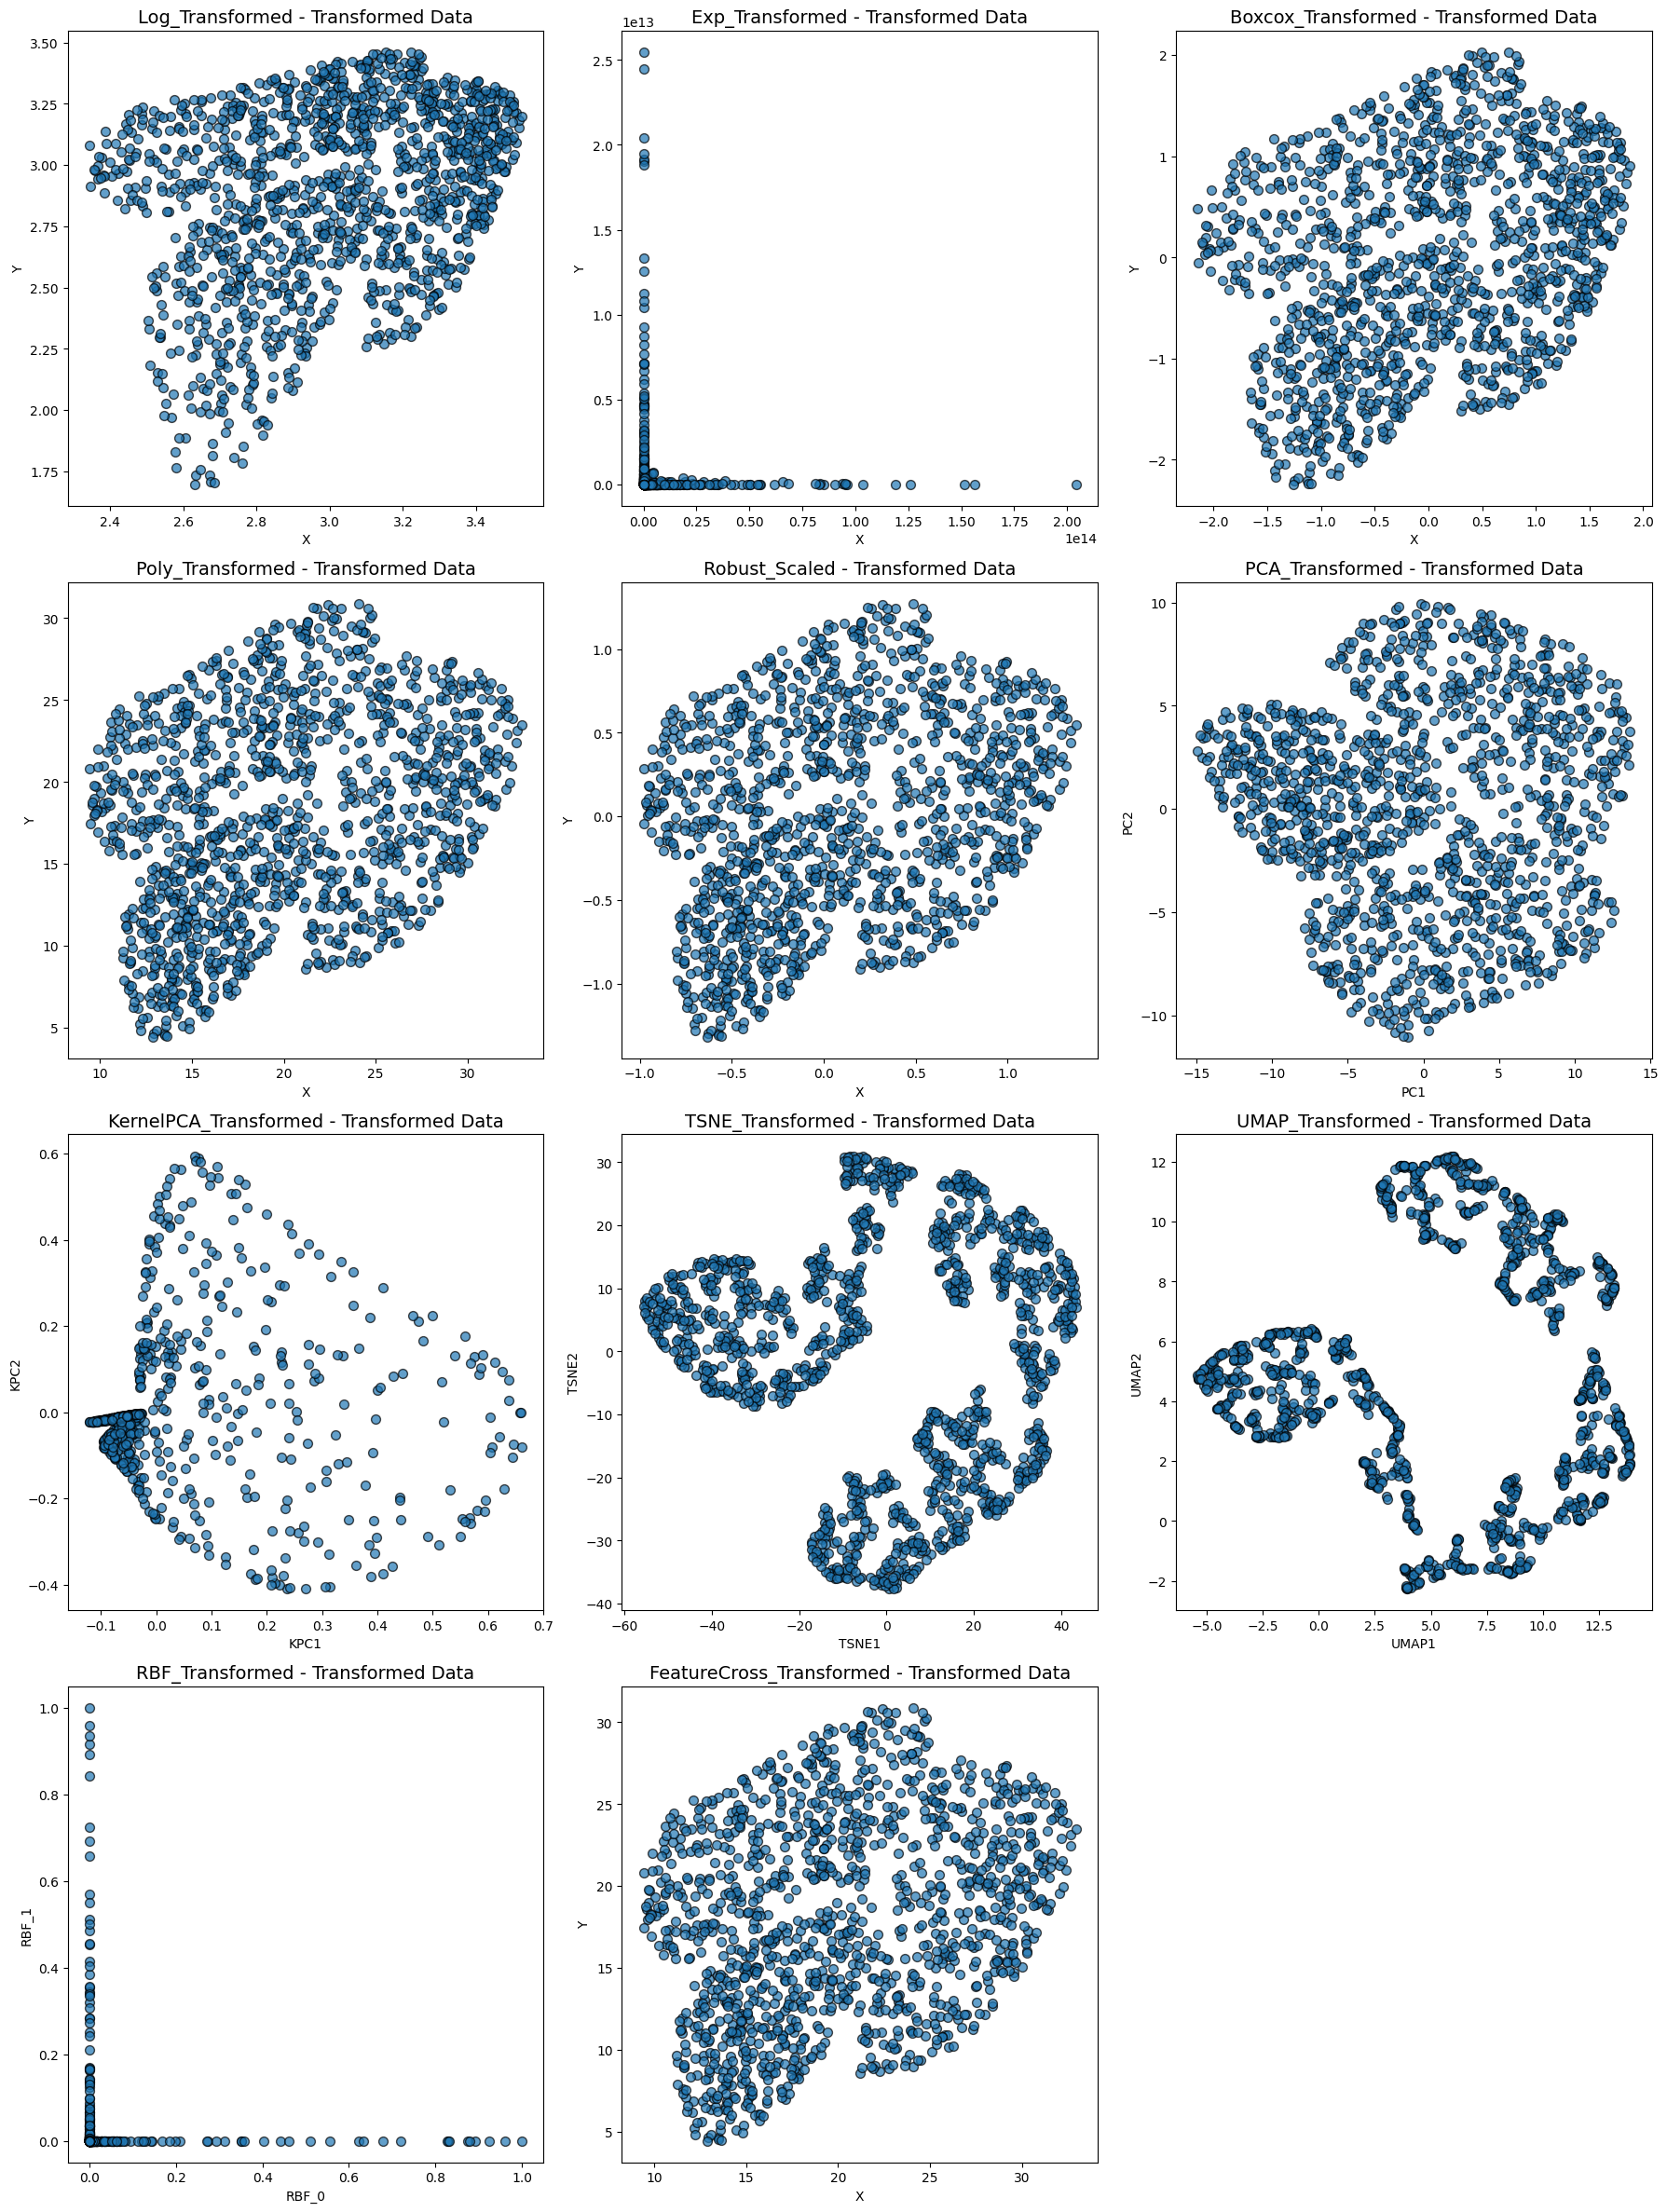

In [46]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, RobustScaler
from sklearn.manifold import TSNE
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics.pairwise import rbf_kernel
import umap
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def apply_transformations(data: pd.DataFrame):
    transformed_data = {}

    log_transformed = np.log(data + 1)
    transformed_data['Log_Transformed'] = pd.DataFrame(log_transformed, columns=data.columns)

    exp_transformed = np.exp(data)
    transformed_data['Exp_Transformed'] = pd.DataFrame(exp_transformed, columns=data.columns)

    boxcox_transformer = PowerTransformer(method='box-cox')
    boxcox_transformed = boxcox_transformer.fit_transform(data)
    transformed_data['Boxcox_Transformed'] = pd.DataFrame(boxcox_transformed, columns=data.columns)

    poly = PolynomialFeatures(degree=2, include_bias=False)
    poly_transformed = poly.fit_transform(data)
    transformed_data['Poly_Transformed'] = pd.DataFrame(poly_transformed, columns=poly.get_feature_names_out(data.columns))

    robust_scaler = RobustScaler()
    robust_scaled = robust_scaler.fit_transform(data)
    transformed_data['Robust_Scaled'] = pd.DataFrame(robust_scaled, columns=data.columns)

    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(data)
    transformed_data['PCA_Transformed'] = pd.DataFrame(pca_transformed, columns=['PC1', 'PC2'])

    kernel_pca = KernelPCA(n_components=2, kernel='rbf')
    kernel_pca_transformed = kernel_pca.fit_transform(data)
    transformed_data['KernelPCA_Transformed'] = pd.DataFrame(kernel_pca_transformed, columns=['KPC1', 'KPC2'])

    tsne = TSNE(n_components=2)
    tsne_transformed = tsne.fit_transform(data)
    transformed_data['TSNE_Transformed'] = pd.DataFrame(tsne_transformed, columns=['TSNE1', 'TSNE2'])

    umap_model = umap.UMAP(n_components=2)
    umap_transformed = umap_model.fit_transform(data)
    transformed_data['UMAP_Transformed'] = pd.DataFrame(umap_transformed, columns=['UMAP1', 'UMAP2'])

    rbf_transformed = rbf_kernel(data, data)
    transformed_data['RBF_Transformed'] = pd.DataFrame(rbf_transformed, columns=[f'RBF_{i}' for i in range(rbf_transformed.shape[1])])

    poly_crosses = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
    feature_cross_transformed = poly_crosses.fit_transform(data)
    transformed_data['FeatureCross_Transformed'] = pd.DataFrame(feature_cross_transformed, columns=poly_crosses.get_feature_names_out(data.columns))

    return transformed_data

transformed_data_dict = apply_transformations(data)

for key, transformed_df in transformed_data_dict.items():
    print(f"\n{key}:\n", transformed_df.head())

import math

n_plots = len(transformed_data_dict)
n_cols = 3
n_rows = math.ceil(n_plots / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 6))

axes = axes.flatten()

for i, (key, transformed_df) in enumerate(transformed_data_dict.items()):
    ax = axes[i]
    ax.scatter(transformed_df.iloc[:, 0], transformed_df.iloc[:, 1], cmap='viridis', s=50, alpha=0.7, edgecolor='k')
    ax.set_title(f"{key} - Transformed Data", fontsize=14)
    ax.set_xlabel(transformed_df.columns[0])
    ax.set_ylabel(transformed_df.columns[1])

for i in range(n_plots, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


Clustering on TSNE...
Silhouette Score for the ensemble clustering: 0.50
Clustering on UMAP...
Silhouette Score for the ensemble clustering: 0.10
Clustering on PCA...
Silhouette Score for the ensemble clustering: 0.12
Clustering on Poly...
Silhouette Score for the ensemble clustering: 0.37


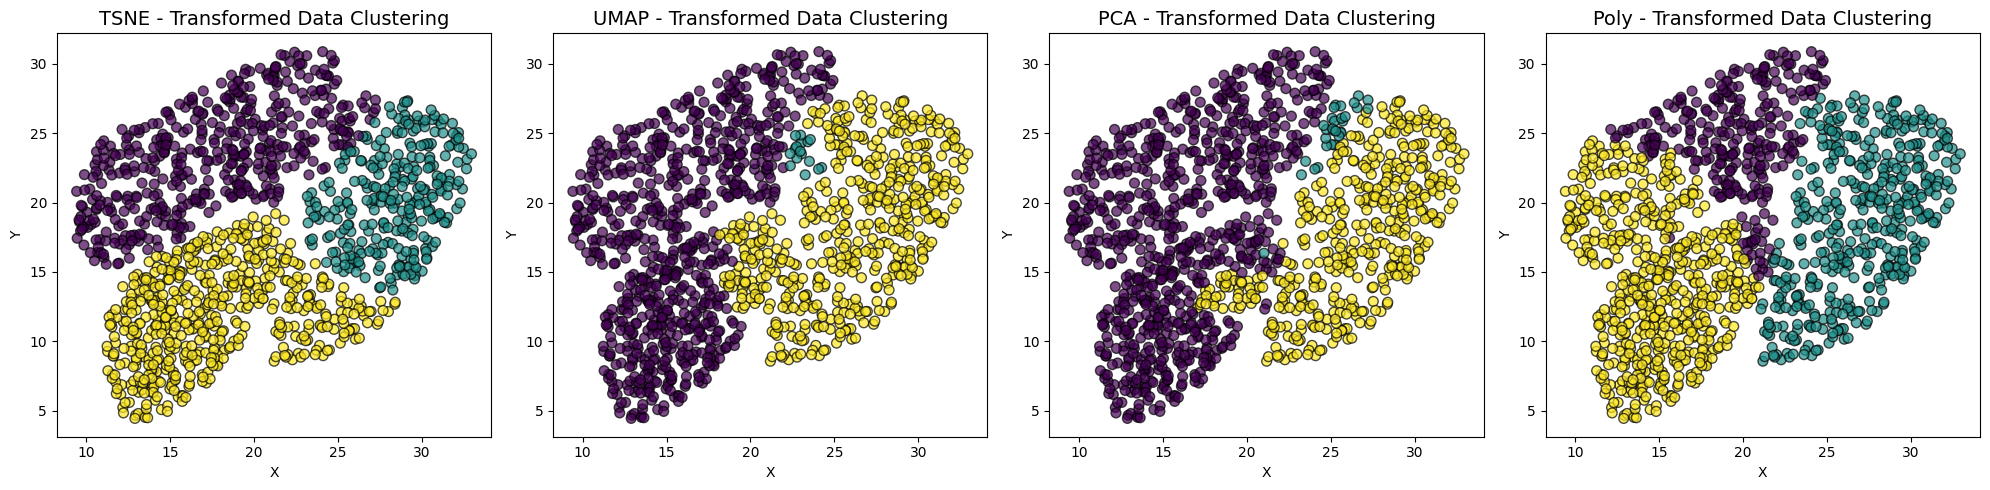

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering, SpectralClustering
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.metrics import silhouette_score

def adjust_labels(labels, label_mapping):
    return np.array([label_mapping[label] for label in labels])

def ensemble_clustering(data, n_clusters=3):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm_labels = gmm.fit_predict(data_scaled)

    agglo = AgglomerativeClustering(n_clusters=n_clusters)
    agglo_labels = agglo.fit_predict(data_scaled)

    spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
    spectral_labels = spectral.fit_predict(data_scaled)

    gmm_label_mapping = {0: 'a', 1: 'b', 2: 'c'}
    agglo_label_mapping = {0: 'c', 1: 'a', 2: 'b'}
    spectral_label_mapping = {0: 'c', 1: 'b', 2: 'a'}

    gmm_labels_adjusted = adjust_labels(gmm_labels, gmm_label_mapping)
    agglo_labels_adjusted = adjust_labels(agglo_labels, agglo_label_mapping)
    spectral_labels_adjusted = adjust_labels(spectral_labels, spectral_label_mapping)

    labels_combined = pd.DataFrame({'GMM': gmm_labels_adjusted, 'Agglomerative': agglo_labels_adjusted, 'Spectral': spectral_labels_adjusted})
    final_labels = labels_combined.mode(axis=1)[0]

    silhouette_avg = silhouette_score(data_scaled, final_labels)
    print(f"Silhouette Score for the ensemble clustering: {silhouette_avg:.2f}")

    return final_labels

def apply_transformations(data):
    tsne = TSNE(n_components=2)
    tsne_transformed = tsne.fit_transform(data)

    umap_model = umap.UMAP(n_components=2)
    umap_transformed = umap_model.fit_transform(data)

    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(data)

    poly = PolynomialFeatures(degree=2, include_bias=False)
    poly_transformed = poly.fit_transform(data)

    return {
        "TSNE": tsne_transformed,
        "UMAP": umap_transformed,
        "PCA": pca_transformed,
        "Poly": poly_transformed
    }

def perform_clustering_with_transformations(data):
    transformed_data_dict = apply_transformations(data)

    transformed_labels = {}

    for key, transformed_data in transformed_data_dict.items():
        print(f"Clustering on {key}...")
        final_labels = ensemble_clustering(transformed_data)
        transformed_labels[key] = final_labels

    fig, axes = plt.subplots(1, 4, figsize=(20, 5))

    for i, (key, final_labels) in enumerate(transformed_labels.items()):
        ax = axes[i]
        ax.scatter(data.iloc[:, 0], data.iloc[:, 1], c=final_labels.map({'a': 0, 'b': 1, 'c': 2}), cmap='viridis', s=50, alpha=0.7, edgecolor='k')
        ax.set_title(f"{key} - Transformed Data Clustering", fontsize=14)
        ax.set_xlabel(data.columns[0])
        ax.set_ylabel(data.columns[1])

    plt.tight_layout()
    plt.show()

perform_clustering_with_transformations(data)


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering, SpectralClustering
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.metrics import silhouette_score

def adjust_labels(labels, label_mapping):
    return np.array([label_mapping[label] for label in labels])

def ensemble_clustering(data, n_clusters=3):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm_labels = gmm.fit_predict(data_scaled)

    agglo = AgglomerativeClustering(n_clusters=n_clusters)
    agglo_labels = agglo.fit_predict(data_scaled)

    spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
    spectral_labels = spectral.fit_predict(data_scaled)

    gmm_label_mapping = {0: 'a', 1: 'b', 2: 'c'}
    agglo_label_mapping = {0: 'c', 1: 'a', 2: 'b'}
    spectral_label_mapping = {0: 'c', 1: 'b', 2: 'a'}

    gmm_labels_adjusted = adjust_labels(gmm_labels, gmm_label_mapping)
    agglo_labels_adjusted = adjust_labels(agglo_labels, agglo_label_mapping)
    spectral_labels_adjusted = adjust_labels(spectral_labels, spectral_label_mapping)

    labels_combined = pd.DataFrame({'GMM': gmm_labels_adjusted, 'Agglomerative': agglo_labels_adjusted, 'Spectral': spectral_labels_adjusted})
    final_labels = labels_combined.mode(axis=1)[0]

    silhouette_avg = silhouette_score(data_scaled, final_labels)
    print(f"Silhouette Score for the ensemble clustering: {silhouette_avg:.2f}")

    return final_labels

def apply_transformations(data):
    tsne = TSNE(n_components=2)
    tsne_transformed = tsne.fit_transform(data)

    umap_model = umap.UMAP(n_components=2)
    umap_transformed = umap_model.fit_transform(data)

    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(data)

    poly = PolynomialFeatures(degree=2, include_bias=False)
    poly_transformed = poly.fit_transform(data)

    return {
        "TSNE": tsne_transformed,
        "UMAP": umap_transformed,
        "PCA": pca_transformed,
        "Poly": poly_transformed
    }

def perform_clustering_with_transformations(data):
    transformed_data_dict = apply_transformations(data)

    transformed_labels = {}

    for key, transformed_data in transformed_data_dict.items():
        print(f"Clustering on {key}...")
        final_labels = ensemble_clustering(transformed_data)
        transformed_labels[key] = final_labels

    fig, axes = plt.subplots(2, 4, figsize=(20, 10))

    for i, (key, final_labels) in enumerate(transformed_labels.items()):
        ax1 = axes[0, i]
        ax1.scatter(data.iloc[:, 0], data.iloc[:, 1], c=final_labels.map({'a': 0, 'b': 1, 'c': 2}), cmap='viridis', s=50, alpha=0.7, edgecolor='k')
        ax1.set_title(f"Original Data - {key} Clustering", fontsize=14)
        ax1.set_xlabel(data.columns[0])
        ax1.set_ylabel(data.columns[1])

        ax2 = axes[1, i]
        ax2.scatter(transformed_data_dict[key][:, 0], transformed_data_dict[key][:, 1], c=final_labels.map({'a': 0, 'b': 1, 'c': 2}), cmap='viridis', s=50, alpha=0.7, edgecolor='k')
        ax2.set_title(f"Transformed Data - {key} Clustering", fontsize=14)
        ax2.set_xlabel(f'{key} 1')
        ax2.set_ylabel(f'{key} 2')

    plt.tight_layout()
    plt.show()

perform_clustering_with_transformations(data)


Output hidden; open in https://colab.research.google.com to view.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering, SpectralClustering
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.metrics import silhouette_score

def adjust_labels(labels, label_mapping):
    return np.array([label_mapping[label] for label in labels])

def ensemble_clustering(data, n_clusters=3):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm_labels = gmm.fit_predict(data_scaled)

    agglo = AgglomerativeClustering(n_clusters=n_clusters)
    agglo_labels = agglo.fit_predict(data_scaled)

    spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
    spectral_labels = spectral.fit_predict(data_scaled)

    gmm_label_mapping = {0: 'a', 1: 'b', 2: 'c'}
    agglo_label_mapping = {0: 'c', 1: 'a', 2: 'b'}
    spectral_label_mapping = {0: 'c', 1: 'b', 2: 'a'}

    gmm_labels_adjusted = adjust_labels(gmm_labels, gmm_label_mapping)
    agglo_labels_adjusted = adjust_labels(agglo_labels, agglo_label_mapping)
    spectral_labels_adjusted = adjust_labels(spectral_labels, spectral_label_mapping)

    labels_combined = pd.DataFrame({'GMM': gmm_labels_adjusted, 'Agglomerative': agglo_labels_adjusted, 'Spectral': spectral_labels_adjusted})
    final_labels = labels_combined.mode(axis=1)[0]

    silhouette_avg = silhouette_score(data_scaled, final_labels)
    print(f"Silhouette Score for the ensemble clustering: {silhouette_avg:.2f}")

    return final_labels

def apply_transformations(data):
    tsne = TSNE(n_components=2)
    tsne_transformed = tsne.fit_transform(data)

    umap_model = umap.UMAP(n_components=2)
    umap_transformed = umap_model.fit_transform(data)

    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(data)

    poly = PolynomialFeatures(degree=2, include_bias=False)
    poly_transformed = poly.fit_transform(data)

    return {
        "TSNE": tsne_transformed,
        "UMAP": umap_transformed,
        "PCA": pca_transformed,
        "Poly": poly_transformed
    }

def perform_clustering_with_transformations(data):
    print("Clustering on Original Data...")
    original_labels = ensemble_clustering(data)

    transformed_data_dict = apply_transformations(data)

    transformed_labels = {}

    for key, transformed_data in transformed_data_dict.items():
        print(f"Clustering on {key}...")
        final_labels = ensemble_clustering(transformed_data)
        transformed_labels[key] = final_labels

    fig, axes = plt.subplots(2, 5, figsize=(25, 10))

    ax1 = axes[0, 0]
    ax1.scatter(data.iloc[:, 0], data.iloc[:, 1], c=original_labels.map({'a': 0, 'b': 1, 'c': 2}), cmap='viridis', s=50, alpha=0.7, edgecolor='k')
    ax1.set_title("Original Data - Clustering", fontsize=14)
    ax1.set_xlabel(data.columns[0])
    ax1.set_ylabel(data.columns[1])

    for i, (key, final_labels) in enumerate(transformed_labels.items()):
        ax_transformed = axes[0, i+1]
        ax_transformed.scatter(data.iloc[:, 0], data.iloc[:, 1], c=final_labels.map({'a': 0, 'b': 1, 'c': 2}), cmap='viridis', s=50, alpha=0.7, edgecolor='k')
        ax_transformed.set_title(f"{key} - Original Data Clustering", fontsize=14)
        ax_transformed.set_xlabel(data.columns[0])
        ax_transformed.set_ylabel(data.columns[1])

        ax_transformed_2 = axes[1, i+1]
        ax_transformed_2.scatter(transformed_data_dict[key][:, 0], transformed_data_dict[key][:, 1], c=final_labels.map({'a': 0, 'b': 1, 'c': 2}), cmap='viridis', s=50, alpha=0.7, edgecolor='k')
        ax_transformed_2.set_title(f"{key} - Transformed Data Clustering", fontsize=14)
        ax_transformed_2.set_xlabel(f'{key} 1')
        ax_transformed_2.set_ylabel(f'{key} 2')

    plt.tight_layout()
    plt.show()

perform_clustering_with_transformations(data)


Output hidden; open in https://colab.research.google.com to view.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import PolynomialFeatures

def adjust_labels(labels, label_mapping):
    return np.array([label_mapping[label] for label in labels])

def ensemble_clustering(data, n_clusters=3):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(data_scaled)

    silhouette_avg = silhouette_score(data_scaled, kmeans_labels)
    print(f"Silhouette Score for KMeans clustering: {silhouette_avg:.2f}")

    return kmeans_labels

def apply_transformations(data):
    tsne = TSNE(n_components=2)
    tsne_transformed = tsne.fit_transform(data)

    umap_model = umap.UMAP(n_components=2)
    umap_transformed = umap_model.fit_transform(data)

    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(data)

    poly = PolynomialFeatures(degree=2, include_bias=False)
    poly_transformed = poly.fit_transform(data)

    return {
        "TSNE": tsne_transformed,
        "UMAP": umap_transformed,
        "PCA": pca_transformed,
        "Poly": poly_transformed
    }

def perform_clustering_with_transformations(data):
    transformed_data_dict = apply_transformations(data)

    transformed_labels = {}

    for key, transformed_data in transformed_data_dict.items():
        print(f"Clustering on {key}...")
        final_labels = ensemble_clustering(transformed_data)
        transformed_labels[key] = final_labels

    fig, axes = plt.subplots(2, 4, figsize=(20, 10))

    for i, (key, final_labels) in enumerate(transformed_labels.items()):
        ax1 = axes[0, i]
        ax1.scatter(data.iloc[:, 0], data.iloc[:, 1], c=final_labels, cmap='viridis', s=50, alpha=0.7, edgecolor='k')
        ax1.set_title(f"Original Data - {key} Clustering", fontsize=14)
        ax1.set_xlabel(data.columns[0])
        ax1.set_ylabel(data.columns[1])

        ax2 = axes[1, i]
        ax2.scatter(transformed_data_dict[key][:, 0], transformed_data_dict[key][:, 1], c=final_labels, cmap='viridis', s=50, alpha=0.7, edgecolor='k')
        ax2.set_title(f"Transformed Data - {key} Clustering", fontsize=14)
        ax2.set_xlabel(f'{key} 1')
        ax2.set_ylabel(f'{key} 2')

    plt.tight_layout()
    plt.show()

perform_clustering_with_transformations(data)


Output hidden; open in https://colab.research.google.com to view.

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.mixture import GaussianMixture

def adjust_labels(labels, label_mapping):
    return np.array([label_mapping[label] for label in labels])

def ensemble_clustering(data, n_clusters=3):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm_labels = gmm.fit_predict(data_scaled)

    silhouette_avg = silhouette_score(data_scaled, gmm_labels)
    print(f"Silhouette Score for Gaussian Mixture Model clustering: {silhouette_avg:.2f}")

    return gmm_labels

def apply_transformations(data):
    tsne = TSNE(n_components=2)
    tsne_transformed = tsne.fit_transform(data)

    umap_model = umap.UMAP(n_components=2)
    umap_transformed = umap_model.fit_transform(data)

    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(data)

    poly = PolynomialFeatures(degree=2, include_bias=False)
    poly_transformed = poly.fit_transform(data)

    return {
        "TSNE": tsne_transformed,
        "UMAP": umap_transformed,
        "PCA": pca_transformed,
        "Poly": poly_transformed
    }

def perform_clustering_with_transformations(data):
    transformed_data_dict = apply_transformations(data)

    transformed_labels = {}

    for key, transformed_data in transformed_data_dict.items():
        print(f"Clustering on {key}...")
        final_labels = ensemble_clustering(transformed_data)
        transformed_labels[key] = final_labels

    fig, axes = plt.subplots(2, 4, figsize=(20, 10))

    for i, (key, final_labels) in enumerate(transformed_labels.items()):
        ax1 = axes[0, i]
        ax1.scatter(data.iloc[:, 0], data.iloc[:, 1], c=final_labels, cmap='viridis', s=50, alpha=0.7, edgecolor='k')
        ax1.set_title(f"Original Data - {key} Clustering", fontsize=14)
        ax1.set_xlabel(data.columns[0])
        ax1.set_ylabel(data.columns[1])

        ax2 = axes[1, i]
        ax2.scatter(transformed_data_dict[key][:, 0], transformed_data_dict[key][:, 1], c=final_labels, cmap='viridis', s=50, alpha=0.7, edgecolor='k')
        ax2.set_title(f"Transformed Data - {key} Clustering", fontsize=14)
        ax2.set_xlabel(f'{key} 1')
        ax2.set_ylabel(f'{key} 2')

    plt.tight_layout()
    plt.show()

perform_clustering_with_transformations(data)


Output hidden; open in https://colab.research.google.com to view.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import AgglomerativeClustering

def adjust_labels(labels, label_mapping):
    return np.array([label_mapping[label] for label in labels])

def ensemble_clustering(data, n_clusters=3):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    agglo = AgglomerativeClustering(n_clusters=n_clusters)
    agglo_labels = agglo.fit_predict(data_scaled)

    silhouette_avg = silhouette_score(data_scaled, agglo_labels)
    print(f"Silhouette Score for Agglomerative Clustering: {silhouette_avg:.2f}")

    return agglo_labels

def apply_transformations(data):
    tsne = TSNE(n_components=2)
    tsne_transformed = tsne.fit_transform(data)

    umap_model = umap.UMAP(n_components=2)
    umap_transformed = umap_model.fit_transform(data)

    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(data)

    poly = PolynomialFeatures(degree=2, include_bias=False)
    poly_transformed = poly.fit_transform(data)

    return {
        "TSNE": tsne_transformed,
        "UMAP": umap_transformed,
        "PCA": pca_transformed,
        "Poly": poly_transformed
    }

def perform_clustering_with_transformations(data):
    transformed_data_dict = apply_transformations(data)

    transformed_labels = {}

    for key, transformed_data in transformed_data_dict.items():
        print(f"Clustering on {key}...")
        final_labels = ensemble_clustering(transformed_data)
        transformed_labels[key] = final_labels

    fig, axes = plt.subplots(2, 4, figsize=(20, 10))

    for i, (key, final_labels) in enumerate(transformed_labels.items()):
        ax1 = axes[0, i]
        ax1.scatter(data.iloc[:, 0], data.iloc[:, 1], c=final_labels, cmap='viridis', s=50, alpha=0.7, edgecolor='k')
        ax1.set_title(f"Original Data - {key} Clustering", fontsize=14)
        ax1.set_xlabel(data.columns[0])
        ax1.set_ylabel(data.columns[1])

        ax2 = axes[1, i]
        ax2.scatter(transformed_data_dict[key][:, 0], transformed_data_dict[key][:, 1], c=final_labels, cmap='viridis', s=50, alpha=0.7, edgecolor='k')
        ax2.set_title(f"Transformed Data - {key} Clustering", fontsize=14)
        ax2.set_xlabel(f'{key} 1')
        ax2.set_ylabel(f'{key} 2')

    plt.tight_layout()
    plt.show()

perform_clustering_with_transformations(data)


Output hidden; open in https://colab.research.google.com to view.

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import SpectralClustering

def adjust_labels(labels, label_mapping):
    return np.array([label_mapping[label] for label in labels])

def ensemble_clustering(data, n_clusters=3):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
    spectral_labels = spectral.fit_predict(data_scaled)

    silhouette_avg = silhouette_score(data_scaled, spectral_labels)
    print(f"Silhouette Score for Spectral Clustering: {silhouette_avg:.2f}")

    return spectral_labels

def apply_transformations(data):
    tsne = TSNE(n_components=2)
    tsne_transformed = tsne.fit_transform(data)

    umap_model = umap.UMAP(n_components=2)
    umap_transformed = umap_model.fit_transform(data)

    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(data)

    poly = PolynomialFeatures(degree=2, include_bias=False)
    poly_transformed = poly.fit_transform(data)

    return {
        "TSNE": tsne_transformed,
        "UMAP": umap_transformed,
        "PCA": pca_transformed,
        "Poly": poly_transformed
    }

def perform_clustering_with_transformations(data):
    transformed_data_dict = apply_transformations(data)

    transformed_labels = {}

    for key, transformed_data in transformed_data_dict.items():
        print(f"Clustering on {key}...")
        final_labels = ensemble_clustering(transformed_data)
        transformed_labels[key] = final_labels

    fig, axes = plt.subplots(2, 4, figsize=(20, 10))

    for i, (key, final_labels) in enumerate(transformed_labels.items()):
        ax1 = axes[0, i]
        ax1.scatter(data.iloc[:, 0], data.iloc[:, 1], c=final_labels, cmap='viridis', s=50, alpha=0.7, edgecolor='k')
        ax1.set_title(f"Original Data - {key} Clustering", fontsize=14)
        ax1.set_xlabel(data.columns[0])
        ax1.set_ylabel(data.columns[1])

        ax2 = axes[1, i]
        ax2.scatter(transformed_data_dict[key][:, 0], transformed_data_dict[key][:, 1], c=final_labels, cmap='viridis', s=50, alpha=0.7, edgecolor='k')
        ax2.set_title(f"Transformed Data - {key} Clustering", fontsize=14)
        ax2.set_xlabel(f'{key} 1')
        ax2.set_ylabel(f'{key} 2')

    plt.tight_layout()
    plt.show()

perform_clustering_with_transformations(data)


Output hidden; open in https://colab.research.google.com to view.